In [21]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction

autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
print('end')

end


In [22]:
# set the matplotlib backend so figures can be saved in the background
# import matplotlib
# matplotlib.use("Agg")
 
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
# from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
# from pyimagesearch.lenet import LeNet
from imutils import paths
# import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os
# from keras.datasets import mnist
# import numpy as np

# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images('photos')))
random.seed(42)
random.shuffle(imagePaths)
# print(imagePaths)

# loop over the input images
for imagePath in imagePaths:
	print(imagePath)
	# load the image, pre-process it, and store it in the data list
	image = cv2.imread(imagePath)
	image = cv2.cvtColor( image, cv2.COLOR_RGB2GRAY )
	image = cv2.resize(image, (28, 28))
	image = img_to_array(image)
	data.append(image)

	# extract the class label from the image path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	# label = 1 if label == "santa" else 0
	labels.append(label)
    
print(labels)

# scale the raw pixel intensities to the range [0, 1]
# data = np.array(data, dtype="float") / 255.0

# data = np.array(data, dtype="float32") / 255

x_train = np.array(data, dtype="float") / 255.0
x_test = np.array(data, dtype="float") / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
labels = np.array(labels)
 
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
# (x_train, x_test, y_train, y_test) = train_test_split(data,
# 	labels, test_size=0.25, random_state=42)
 
# convert the labels from integers to vectors
# y_train = to_categorical(y_train, num_classes=4)
# y_test = to_categorical(y_test, num_classes=4)

print('end')

# (x_train, _), (x_test, _) = mnist.load_data()

# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# print(x_train.shape)
# print(x_test.shape)

[INFO] loading images...
photos\3\tony.1.jpg
photos\1\saduah.3.jpg
photos\3\tony.3.jpg
photos\0\cjcarr.5.jpg
photos\1\saduah.12.jpg
photos\1\saduah.17.jpg
photos\3\tony.4.jpg
photos\3\tony.8.jpg
photos\2\slbirc.13.jpg
photos\1\saduah.16.jpg
photos\0\cjcarr.3.jpg
photos\3\tony.11.jpg
photos\2\slbirc.11.jpg
photos\2\slbirc.17.jpg
photos\2\slbirc.10.jpg
photos\2\slbirc.8.jpg
photos\0\cjcarr.14.jpg
photos\1\saduah.18.jpg
photos\3\tony.15.jpg
photos\0\cjcarr.15.jpg
photos\2\slbirc.1.jpg
photos\0\cjcarr.4.jpg
photos\2\slbirc.20.jpg
photos\1\saduah.19.jpg
photos\3\tony.9.jpg
photos\1\saduah.4.jpg
photos\0\cjcarr.10.jpg
photos\3\tony.14.jpg
photos\1\saduah.6.jpg
photos\3\tony.19.jpg
photos\1\saduah.14.jpg
photos\1\saduah.9.jpg
photos\2\slbirc.19.jpg
photos\1\saduah.7.jpg
photos\0\cjcarr.7.jpg
photos\2\slbirc.16.jpg
photos\2\slbirc.6.jpg
photos\2\slbirc.12.jpg
photos\3\tony.20.jpg
photos\0\cjcarr.8.jpg
photos\3\tony.10.jpg
photos\3\tony.7.jpg
photos\0\cjcarr.13.jpg
photos\1\saduah.8.jpg
photos\

In [ ]:
# json_file = open("faces_model_conv", "r")
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# loaded_model.load_weights("faces_model_conv.h5")

In [23]:
autoencoder.load_weights("photos_copy.h5")
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [24]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

print('end')

end


[0.54117647 0.54117647 0.53333333 0.54117647 0.52156863 0.52941176
 0.52156863 0.50980392 0.5254902  0.54117647 0.54509804 0.55686275
 0.51764706 0.70196078 0.56862745 0.5254902  0.51372549 0.57647059
 0.54509804 0.5254902  0.53333333 0.52941176 0.51764706 0.53333333
 0.52941176 0.5254902  0.51372549 0.53333333 0.55294118 0.53333333
 0.54901961 0.54509804 0.54901961 0.54117647 0.52941176 0.53333333
 0.54117647 0.56078431 0.79607843 0.31764706 0.37647059 0.48627451
 0.72156863 0.57254902 0.52941176 0.58431373 0.56470588 0.58823529
 0.52156863 0.5372549  0.52941176 0.5254902  0.52941176 0.54117647
 0.5254902  0.52941176 0.54509804 0.54901961 0.54509804 0.55686275
 0.54117647 0.54509804 0.54901961 0.54509804 0.56078431 0.71764706
 0.25098039 0.42352941 0.54509804 0.56470588 0.58431373 0.64705882
 0.31764706 0.62745098 0.92941176 0.68627451 0.51764706 0.50588235
 0.5372549  0.52941176 0.53333333 0.53333333 0.53333333 0.5372549
 0.52941176 0.54117647 0.54117647 0.55294118 0.54509804 0.54901

[0.53333333 0.53333333 0.53333333 0.52941176 0.53333333 0.5254902
 0.52156863 0.53333333 0.53333333 0.54117647 0.52941176 0.5254902
 0.50980392 0.57254902 0.5372549  0.45098039 0.59607843 0.59215686
 0.55294118 0.52941176 0.55294118 0.56078431 0.53333333 0.53333333
 0.51764706 0.51764706 0.50980392 0.5254902  0.54901961 0.54901961
 0.54117647 0.5372549  0.54901961 0.54509804 0.54901961 0.5372549
 0.5372549  0.5372549  0.52941176 0.52156863 0.5372549  0.65490196
 0.8745098  0.43137255 0.30980392 0.54117647 0.52941176 0.47058824
 0.50980392 0.53333333 0.56862745 0.53333333 0.53333333 0.53333333
 0.52941176 0.5254902  0.54901961 0.55294118 0.54117647 0.54117647
 0.53333333 0.5372549  0.53333333 0.54117647 0.54509804 0.53333333
 0.53333333 0.56078431 0.68627451 0.66666667 0.23137255 0.35294118
 0.29019608 0.43137255 0.64705882 0.6745098  0.71764706 0.43529412
 0.56470588 0.61960784 0.5254902  0.52941176 0.5254902  0.52156863
 0.54901961 0.5372549  0.52941176 0.54901961 0.54901961 0.5411764

[0.77254902 0.77647059 0.78039216 0.79215686 0.78431373 0.78039216
 0.77647059 0.75294118 0.78039216 0.76078431 0.75686275 0.75294118
 0.75686275 0.76862745 0.76078431 0.75686275 0.76862745 0.77254902
 0.76862745 0.74117647 0.77647059 0.76078431 0.76862745 0.76470588
 0.74509804 0.74901961 0.74901961 0.76862745 0.77254902 0.78039216
 0.76862745 0.78823529 0.78431373 0.76078431 0.77254902 0.78431373
 0.79215686 0.78823529 0.76470588 0.76862745 0.76862745 0.75686275
 0.74117647 0.75686275 0.76862745 0.77647059 0.75686275 0.75294118
 0.75686275 0.76078431 0.75294118 0.76078431 0.76862745 0.75294118
 0.7372549  0.72941176 0.76470588 0.76470588 0.75294118 0.77647059
 0.75294118 0.75686275 0.75686275 0.76078431 0.74901961 0.77254902
 0.78431373 0.49411765 0.2        0.17647059 0.32941176 0.41568627
 0.76862745 0.73333333 0.76862745 0.75294118 0.77254902 0.75686275
 0.76078431 0.74901961 0.74117647 0.74509804 0.7372549  0.7372549
 0.75686275 0.76862745 0.76470588 0.76470588 0.75294118 0.75294

[0.77254902 0.77254902 0.78039216 0.76078431 0.76862745 0.76470588
 0.77254902 0.78039216 0.78823529 0.77647059 0.77647059 0.73333333
 0.74901961 0.75294118 0.77647059 0.74901961 0.75294118 0.76862745
 0.77647059 0.75294118 0.76470588 0.77254902 0.75686275 0.76862745
 0.75294118 0.76078431 0.76078431 0.74901961 0.77254902 0.78039216
 0.76078431 0.78823529 0.78823529 0.76862745 0.77254902 0.78039216
 0.78039216 0.79215686 0.76470588 0.76862745 0.75686275 0.74901961
 0.76078431 0.74509804 0.76862745 0.78039216 0.78039216 0.76078431
 0.74901961 0.76078431 0.75686275 0.77254902 0.76470588 0.75686275
 0.74901961 0.76078431 0.77254902 0.77254902 0.76078431 0.77254902
 0.76862745 0.76078431 0.75686275 0.74117647 0.76078431 0.78431373
 0.70980392 0.32156863 0.15686275 0.18431373 0.29019608 0.69803922
 0.74901961 0.74117647 0.75686275 0.74901961 0.75686275 0.75294118
 0.75294118 0.74509804 0.75294118 0.75686275 0.76078431 0.74509804
 0.76862745 0.78039216 0.76470588 0.75686275 0.77254902 0.7607

[0.54509804 0.55686275 0.53333333 0.5372549  0.55294118 0.5372549
 0.5372549  0.5372549  0.5372549  0.48235294 0.60784314 0.61568627
 0.51372549 0.5254902  0.5254902  0.57254902 0.54509804 0.54509804
 0.5372549  0.54117647 0.5372549  0.54117647 0.55686275 0.54117647
 0.54117647 0.52941176 0.52941176 0.54509804 0.54509804 0.55294118
 0.55294118 0.55686275 0.55294118 0.56078431 0.56078431 0.56862745
 0.50980392 0.51764706 0.45098039 0.51764706 0.54509804 0.50980392
 0.53333333 0.49019608 0.50196078 0.68235294 0.58431373 0.55294118
 0.55294118 0.56078431 0.56078431 0.54509804 0.5372549  0.5372549
 0.54509804 0.53333333 0.56470588 0.56470588 0.56862745 0.54901961
 0.54901961 0.53333333 0.56470588 0.64313725 0.4627451  0.27058824
 0.55686275 0.72941176 0.55294118 0.62745098 0.67058824 0.43921569
 0.23921569 0.43921569 0.41568627 0.57254902 0.56470588 0.5372549
 0.56078431 0.55686275 0.54901961 0.53333333 0.5372549  0.5372549
 0.54901961 0.56470588 0.54901961 0.54901961 0.55686275 0.5372549


[0.27058824 0.2745098  0.2745098  0.27843137 0.28627451 0.27843137
 0.28627451 0.28235294 0.29019608 0.2745098  0.29019608 0.24705882
 0.17254902 0.21176471 0.31764706 0.32941176 0.3372549  0.27058824
 0.2627451  0.27843137 0.27843137 0.27843137 0.27843137 0.27058824
 0.27843137 0.2745098  0.2745098  0.27058824 0.27843137 0.27843137
 0.27843137 0.29019608 0.27843137 0.29019608 0.29411765 0.27843137
 0.27058824 0.24313725 0.22352941 0.29019608 0.29019608 0.28235294
 0.15294118 0.2627451  0.11764706 0.28235294 0.23529412 0.22745098
 0.29019608 0.27843137 0.28627451 0.27843137 0.2745098  0.27058824
 0.28235294 0.28235294 0.28627451 0.28235294 0.28627451 0.29411765
 0.28627451 0.28235294 0.28627451 0.28235294 0.23529412 0.21568627
 0.10588235 0.10980392 0.2        0.42745098 0.30196078 0.25882353
 0.09411765 0.1254902  0.30588235 0.27843137 0.27058824 0.28235294
 0.2745098  0.2745098  0.27843137 0.2745098  0.28235294 0.28627451
 0.27843137 0.27843137 0.28235294 0.28235294 0.28235294 0.2980

[0.79215686 0.76862745 0.78039216 0.77647059 0.76470588 0.77647059
 0.78039216 0.77647059 0.77647059 0.75294118 0.75294118 0.73333333
 0.76470588 0.75686275 0.76078431 0.76470588 0.76078431 0.76862745
 0.75686275 0.74117647 0.74509804 0.75294118 0.7254902  0.74509804
 0.74509804 0.74117647 0.74901961 0.7372549  0.78039216 0.78039216
 0.76862745 0.76470588 0.78039216 0.75686275 0.77254902 0.78039216
 0.78431373 0.78039216 0.76862745 0.75686275 0.76862745 0.76862745
 0.76078431 0.76470588 0.76862745 0.77647059 0.77647059 0.75294118
 0.76470588 0.75686275 0.76470588 0.75294118 0.76078431 0.76862745
 0.75294118 0.75294118 0.78431373 0.76078431 0.76078431 0.77254902
 0.77254902 0.74901961 0.76470588 0.75686275 0.74901961 0.7372549
 0.70196078 0.32941176 0.16078431 0.18823529 0.31764706 0.70196078
 0.74901961 0.73333333 0.74901961 0.7372549  0.74901961 0.74509804
 0.74901961 0.75294118 0.7372549  0.75294118 0.74509804 0.74117647
 0.77254902 0.77254902 0.76078431 0.75686275 0.74901961 0.76862

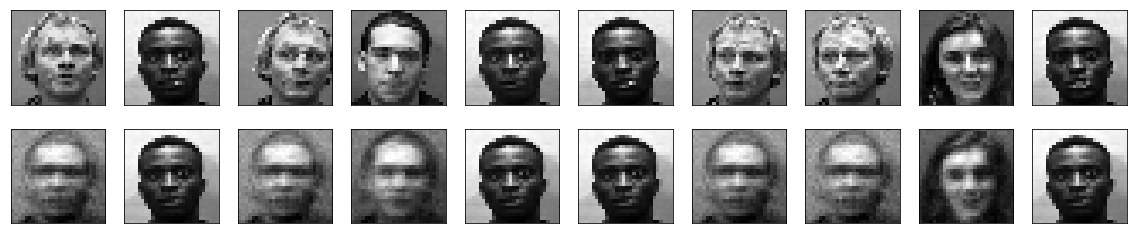

In [25]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    print(x_test[i])
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
